<a href="https://colab.research.google.com/github/wandamoosejaw/DataScienceStudySession/blob/main/dataSciencePractice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import requests

# Wikipedia API endpoint
url = "https://en.wikipedia.org/w/api.php"

# Parameters to request the plain-text extract of the "Data science" article
params = {
    "action": "query",
    "prop": "extracts",
    "explaintext": True,   # get plain text (no HTML tags)
    "titles": "Data science",
    "format": "json"
}

# Identify our script properly with a User-Agent
headers = {
    "User-Agent": "DataSciencePractice/1.0 (for personal learning)"
}

# Make the request
response = requests.get(url, params=params, headers=headers)
data = response.json()

# Extract the text content of the page
page = next(iter(data["query"]["pages"].values()))
text = page["extract"]

# Preview the first 1000 characters
print(text[:1000])

Data science is an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processing, scientific visualization, algorithms and systems to extract or extrapolate knowledge from potentially noisy, structured, or unstructured data. 
Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine). Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.
Data science is "a concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gra

In [16]:
#Get insights from keywords and use the Python Library RAKE for keyword instructions

#install RAKE
import sys
!{sys.executable} -m pip install nlp_rake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.3/122.3 kB 10.9 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=b1b928f27879c1ed7d475b7d632dbb29579fba10045e9ca2c3ad7bf66575b997
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


In [24]:
#import RAKE
import nlp_rake

#setting min length of a keyword = 2 char, min frequency =3 ; max num of words in a keyword = 5
extractor = nlp_rake.Rake(max_words=2, min_freq=3, min_chars=5)
res = extractor.apply(text)
res

[('data scientist', 4.0),
 ('data science', 3.875),
 ('computer science', 3.875),
 ('data analysis', 3.7142857142857144),
 ('science', 1.875),
 ('statistics', 1.4166666666666667)]

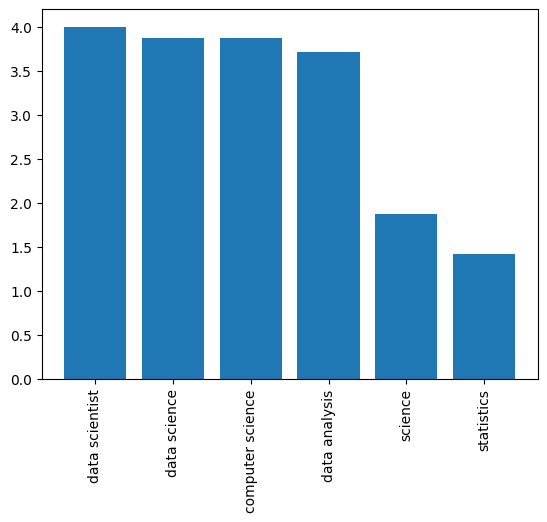

In [25]:
#Visualizing the result using matplotlib

import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k, rotation='vertical')
    plt.show()

plot(res)

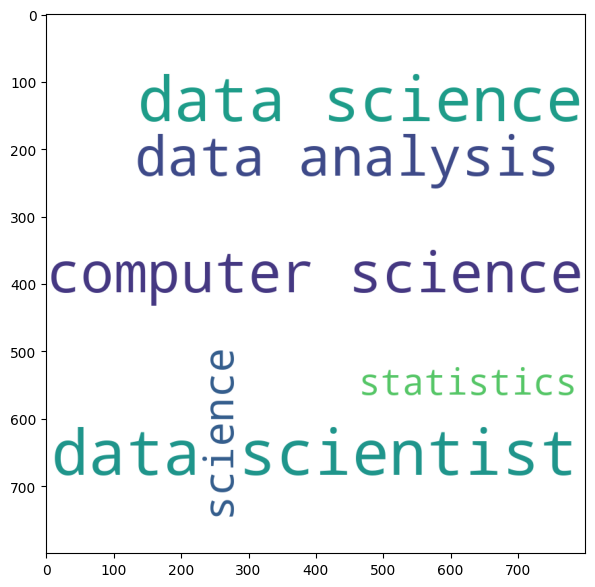

In [27]:
#Utilize wordcloud
!{sys.executable} -m pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white', width=800, height=800)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({k:v for k,v in res}))

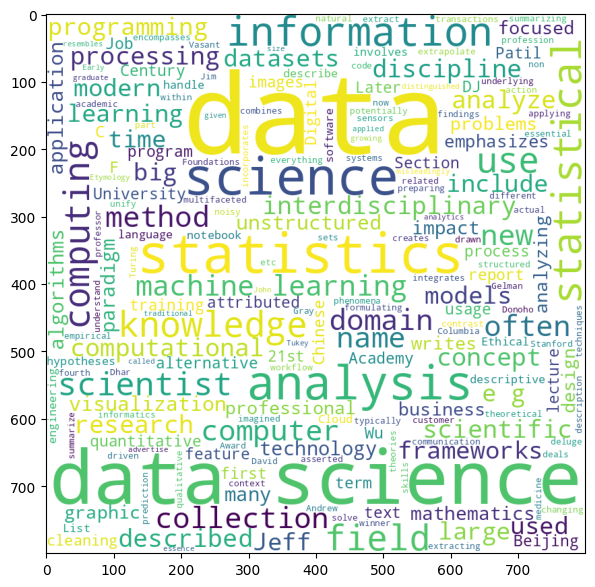

In [28]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))